In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4,4)
import keras
import cv2

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

from keras.models import Sequential
from keras.models import load_model
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [38]:
nb_classes = 10 # number of classes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


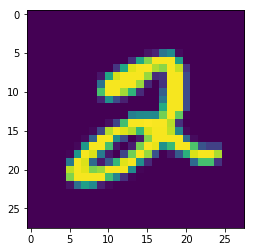

In [39]:
plt.imshow(X_train[5])

In [40]:
dim = (48, 48)

#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [41]:
rgb_list = []
#convert X_train data to 48x48 rgb values
for i in range(len(X_train)):
    rgb = to_rgb(X_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
rgb_arr = np.stack([rgb_list],axis=4)
rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
print(rgb_arr_to_3d.shape)

(60000, 48, 48, 3)


In [42]:
#changing the shape of the input dimension
input_arr = rgb_arr_to_3d
np.moveaxis(input_arr, -1, 1).shape

(60000, 3, 48, 48)

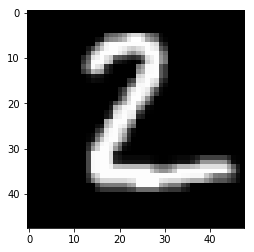

In [43]:
plt.imshow(rgb_list_test[1])

In [44]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train.shape)
print(Y_train[55])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [45]:
print(rgb_arr_to_3d.shape, rgb_arr_to_3d_test.shape, Y_train.shape, Y_test.shape)

(60000, 48, 48, 3) (10000, 48, 48, 3) (60000, 10) (10000, 10)


In [46]:
def vgg16():
    
    base_model = keras.applications.vgg16.VGG16(weights='imagenet',include_top=False,pooling='avg',input_shape=(48, 48, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    predictions = Dense(10, activation='softmax')(X)
    # magical line of freezing layers
    for layer in base_model.layers:
        layer.trainable=False
    model = Model(inputs=base_model.input, outputs=predictions)
    
    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model

vgg16= vgg16()
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [47]:
print("Number of layers: "+ str(len(vgg16.layers)))

Number of layers: 21


In [48]:
def vgg19():
    
    base_model = keras.applications.vgg19.VGG19(weights='imagenet',include_top=False,pooling='avg',input_shape=(48, 48, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    predictions = Dense(10, activation='softmax')(X)
    # magical line of freezing layers
    for layer in base_model.layers:
        layer.trainable=False
    model = Model(inputs=base_model.input, outputs=predictions)
    
    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model

vgg19=vgg19()
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [49]:
print("Number of layers: "+ str(len(vgg19.layers)))

Number of layers: 24


In [50]:
def resnet50():
    
    base_model = keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False,pooling='avg',input_shape=(48, 48, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    predictions = Dense(10, activation='softmax')(X)
    # magical line of freezing layers
    for layer in base_model.layers:
        layer.trainable=False
    model = Model(inputs=base_model.input, outputs=predictions)
    
    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model

resnet50=resnet50()
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [51]:
print("Number of layers: "+ str(len(resnet50.layers)))

Number of layers: 177


In [53]:
print(rgb_arr_to_3d.shape, rgb_arr_to_3d_test.shape, Y_train.shape, Y_test.shape)

(60000, 48, 48, 3) (10000, 48, 48, 3) (60000, 10) (10000, 10)


### Xception accepts a min input dim of (71,71)

Source: keras docs

In [58]:
mnist_xception_train = []
for x in rgb_arr_to_3d:
    img = cv2.resize(x, (71,71))
    mnist_xception_train.append(img)

In [59]:
mnist_xception_test= []
for x in rgb_arr_to_3d_test:
    img = cv2.resize(x, (71,71))
    mnist_xception_test.append(img)

In [60]:
xception_train = np.array(mnist_xception_train)
xception_test = np.array(mnist_xception_test)

In [61]:
print(xception_train.shape, xception_test.shape, Y_train.shape, Y_test.shape)

(60000, 71, 71, 3) (10000, 71, 71, 3) (60000, 10) (10000, 10)


In [27]:
def xception():

    base_model = keras.applications.xception.Xception(weights='imagenet',include_top=False,pooling='avg',input_shape=(71, 71, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    predictions = Dense(10, activation='softmax')(X)
    # magical line of freezing layers
    for layer in base_model.layers:
        layer.trainable=False
    model = Model(inputs=base_model.input, outputs=predictions)
    
    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model

xception=xception()
xception.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 71, 71, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [25]:
print("Number of layers: "+ str(len(xception.layers)))

Number of layers: 134
